In [20]:
import pandas as pd
from datetime import datetime

In [13]:
df = pd.read_csv("ProjectTweets.csv",header = None)

In [29]:
df.head()

,index,id,date,flag,user,text,week,month
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April


In [14]:
columns_names=['index','id','date','flag','user','text']

In [16]:
df.columns = columns_names

In [21]:
# remove PDT 
df['date'] = df['date'].str.replace('PDT', '')

In [22]:
# time format
date_format = '%a %b %d %H:%M:%S %Y'

In [23]:
# column in object 
df['date'] = pd.to_datetime(df['date'], format=date_format)

In [24]:
# date objects
print(df['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1600000, dtype: datetime64[ns]


In [25]:
df['date'].min()

Timestamp('2009-04-06 22:19:45')

In [26]:
df['date'].max()

Timestamp('2009-06-25 10:28:31')

In [27]:
df['week'] = df['date'].dt.strftime('%U')  # week



In [28]:
df['month'] = df['date'].dt.strftime('%B')  # month

In [30]:
df['day'] = df['date'].dt.strftime('%A')  # day

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   index   1600000 non-null  int64         
 1   id      1600000 non-null  int64         
 2   date    1600000 non-null  datetime64[ns]
 3   flag    1600000 non-null  object        
 4   user    1600000 non-null  object        
 5   text    1600000 non-null  object        
 6   week    1600000 non-null  object        
 7   month   1600000 non-null  object        
 8   day     1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 109.9+ MB


In [33]:
import nltk

In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in df['text']:
    pol_score = sia.polarity_scores(line)
    pol_score['text'] = line
    results.append(pol_score)

In [38]:
df1 = pd.DataFrame.from_records(results)
df1.head()

,neg,neu,pos,compound,text
0,0.129,0.745,0.126,-0.0173,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0.303,0.697,0.000,-0.7500,is upset that he can't update his Facebook by ...
2,0.000,0.833,0.167,0.4939,@Kenichan I dived many times for the ball. Man...
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire
4,0.241,0.759,0.000,-0.6597,"@nationwideclass no, it's not behaving at all...."


In [40]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1
df1.loc[df1['compound'] < -0.2, 'label'] = -1
df1.head()

,neg,neu,pos,compound,text,label
0,0.129,0.745,0.126,-0.0173,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0.303,0.697,0.000,-0.7500,is upset that he can't update his Facebook by ...,-1
2,0.000,0.833,0.167,0.4939,@Kenichan I dived many times for the ball. Man...,1
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire,-1
4,0.241,0.759,0.000,-0.6597,"@nationwideclass no, it's not behaving at all....",-1


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

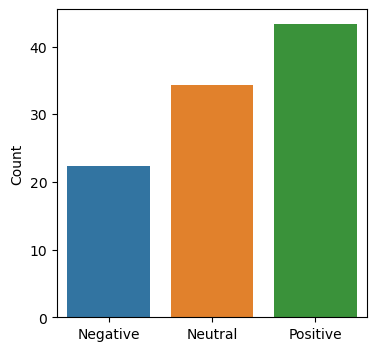

In [43]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df1.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [44]:
merged_df = pd.merge(df, df1, on="text", how="inner")

In [45]:
merged_df.head()

,index,id,date,flag,user,text,week,month,day,neg,neu,pos,compound,label
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,0.129,0.745,0.126,-0.0173,0
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,0.303,0.697,0.000,-0.7500,-1
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,0.000,0.833,0.167,0.4939,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,0.321,0.500,0.179,-0.2500,-1
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,0.241,0.759,0.000,-0.6597,-1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 7.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
from textblob import TextBlob

def assign_sentiment(text):
    
    blob = TextBlob(text)
    
    
    sentimento = blob.sentiment.polarity
    
    
    return sentimento


In [49]:

df['sentiment'] = df['text'].apply(assign_sentiment)


In [52]:
df.head()

,index,id,date,flag,user,text,week,month,day,sentiment,label
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,0.216667,1
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,0.000000,0
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,0.500000,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,0.200000,0
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,-0.625000,-1


In [51]:

df['label'] = 0

df.loc[df['sentiment'] > 0.2, 'label'] = 1
df.loc[df['sentiment'] < -0.2, 'label'] = -1


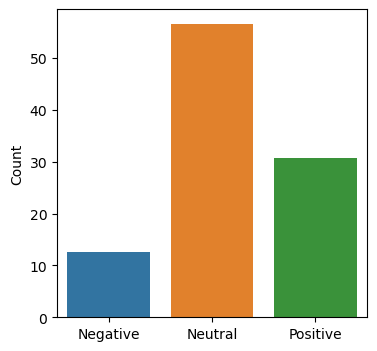

In [53]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



In [55]:
# Tokenization, Stopword Removal, and Lemmatization
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

documents = []
labels = []

In [57]:
data = df['text']

In [58]:
type(data)

pandas.core.series.Series